# Logistic regression

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Hyper-parameters

In [3]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Data

In [4]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [5]:
data_iter = iter(train_loader)
X, y = data_iter.next()

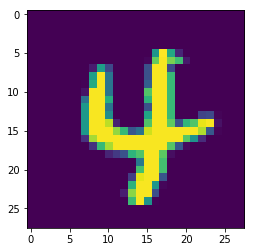

In [8]:
plt.imshow(X[2, 0])

# Model

In [9]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

In [10]:
model(Variable(X.view(-1, 28*28)))

Variable containing:
 0.1455  0.1905  0.4963  ...  -0.0244 -0.1913 -0.0413
 0.1488  0.0278  0.0278  ...  -0.1386 -0.1633 -0.1846
 0.2674  0.0858 -0.1752  ...  -0.1133  0.1344  0.0985
          ...             ⋱             ...          
 0.2992  0.0278 -0.0148  ...  -0.2400  0.1752  0.0147
 0.1983  0.1622  0.3954  ...  -0.1230 -0.3849  0.2058
 0.3478 -0.3198  0.3208  ...  -0.0655 -0.0109  0.1070
[torch.FloatTensor of size 100x10]

# Loss and optimizer

In [11]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                  % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 2.1950
Epoch: [1/5], Step: [200/600], Loss: 2.0979
Epoch: [1/5], Step: [300/600], Loss: 1.9969
Epoch: [1/5], Step: [400/600], Loss: 1.9561
Epoch: [1/5], Step: [500/600], Loss: 1.8602
Epoch: [1/5], Step: [600/600], Loss: 1.7706
Epoch: [2/5], Step: [100/600], Loss: 1.7583
Epoch: [2/5], Step: [200/600], Loss: 1.6145
Epoch: [2/5], Step: [300/600], Loss: 1.5692
Epoch: [2/5], Step: [400/600], Loss: 1.6344
Epoch: [2/5], Step: [500/600], Loss: 1.5381
Epoch: [2/5], Step: [600/600], Loss: 1.4548
Epoch: [3/5], Step: [100/600], Loss: 1.4436
Epoch: [3/5], Step: [200/600], Loss: 1.4030
Epoch: [3/5], Step: [300/600], Loss: 1.4383
Epoch: [3/5], Step: [400/600], Loss: 1.2643
Epoch: [3/5], Step: [500/600], Loss: 1.2676
Epoch: [3/5], Step: [600/600], Loss: 1.2026
Epoch: [4/5], Step: [100/600], Loss: 1.1776
Epoch: [4/5], Step: [200/600], Loss: 1.2393
Epoch: [4/5], Step: [300/600], Loss: 1.1839
Epoch: [4/5], Step: [400/600], Loss: 1.2077
Epoch: [4/5], Step: [500/600], L

# Test the model

In [12]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 82 %
